<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/part3_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with pd.HDFStore('/content/drive/MyDrive/1000/part2_result',  mode='r') as newstore:
    result = newstore.select('result')

In [4]:
print(result)

             0         1         2  ...         8         9  label
0    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
1    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
2    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
3    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
4    -1.680599 -3.061217 -0.040984  ...  0.006186  0.002988      1
...        ...       ...       ...  ...       ...       ...    ...
1315 -1.680599 -3.061217 -0.040984  ... -0.035323 -0.015205      0
1316 -1.680599 -3.061217 -0.040984  ... -0.012077 -0.016767      0
1317 -1.680599 -3.061217 -0.040984  ... -0.011761 -0.013474      0
1318 -1.680599 -3.061217 -0.040984  ...  0.004503  0.113459      0
1319 -1.680599 -3.061217 -0.040984  ... -0.022880  0.001418      0

[1320 rows x 71 columns]


# **logestic** **regression**

In [5]:
print(result)

             0         1         2  ...         8         9  label
0    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
1    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
2    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
3    -1.680599 -3.061217 -0.040984  ... -0.006112 -0.004759      1
4    -1.680599 -3.061217 -0.040984  ...  0.006186  0.002988      1
...        ...       ...       ...  ...       ...       ...    ...
1315 -1.680599 -3.061217 -0.040984  ... -0.035323 -0.015205      0
1316 -1.680599 -3.061217 -0.040984  ... -0.012077 -0.016767      0
1317 -1.680599 -3.061217 -0.040984  ... -0.011761 -0.013474      0
1318 -1.680599 -3.061217 -0.040984  ...  0.004503  0.113459      0
1319 -1.680599 -3.061217 -0.040984  ... -0.022880  0.001418      0

[1320 rows x 71 columns]


In [6]:
import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']

In [7]:
X=result_nonlabel
y=result.label

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [10]:
predictions = logisticRegr.predict(x_test)

In [11]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9747474747474747


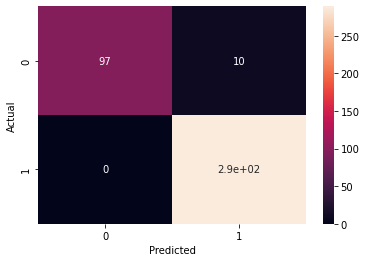

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [13]:
print('Accuracy: ',metrics.accuracy_score(y_test, predictions))
plt.show()

Accuracy:  0.9747474747474747
